# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y)).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.

$$m(a + bX) = \dfrac{1}{N} \sum_{i=1}^N (a + b \times x_i)$$
$$= \dfrac{1}{N} \sum_{i=1}^N a + \dfrac{1}{N} \sum_{i=1}^N (b \times x_i)$$
$$=\dfrac{1}{N} (N \times a) + b \times \dfrac{1}{N} \sum_{i=1}^N x_i$$
$$= a + b \times \dfrac{1}{N} \sum_{i=1}^N x_i$$
$$= a + b \times m(X)$$

2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$

$$\text{cov}(X,a+bY) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))((a + b \times y_i) - m(a + bY))$$
$$= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))((a + b \times y_i) - (a + b \times m(Y)))$$
$$= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))((b \times y_i) - (b \times m(Y)))$$
$$= \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(b(y_i - m(Y)))$$
$$= b \times \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))$$
$$= b \times \text{cov}(X,Y)$$

3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.

$$\text{cov}(a+bX,a+bX) = \dfrac{1}{N} \sum_{i=1}^N ((a + b \times x_i) - m(a + b \times X))((a + b \times x_i) - m(a + b \times X))$$
$$= \dfrac{1}{N} \sum_{i=1}^N ((a + b \times x_i) - m(a + b \times X))^2$$
$$= \dfrac{1}{N} \sum_{i=1}^N ((a + b \times x_i) - (a + b \times m(X)))^2$$
$$= \dfrac{1}{N} \sum_{i=1}^N ((b \times x_i) - (b \times m(X)))^2$$
$$= \dfrac{1}{N} \sum_{i=1}^N (b(x_i - m(X)))^2$$
$$= b^2 \times \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2$$
$$= b^2 \text{cov}(X,X)$$
$$= b^2 \times s^2$$

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?

The transformation of the median is the median of the transformed variable; since every element is transformed by a non-decreasing function, the ordering of elements is preserved so the median remains in its position. This same logic holds for all quartiles. The transformation of the IQR or range is not the IQR/range of the transformed variable, since those two values are dependent on differences between values in the dataset.

5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

No -- the transformation may change the degree to which different elements of the dataset affect the mean (e.g., extremely high outliers will not have as large of an effect if a log function is applied), so we can't rely on the mean of the transformation to be the same as the transformation of the mean.

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

In [5]:
import pandas as pd

df = pd.read_csv("data/ForeignGifts_edu.csv")
df.head()

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64

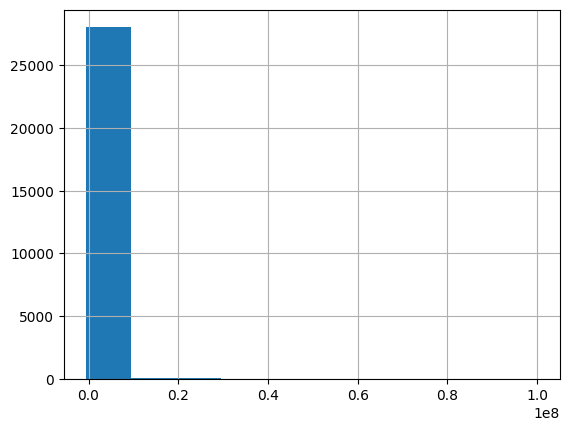

In [11]:
df["Foreign Gift Amount"].hist()
df["Foreign Gift Amount"].describe()
# seems like there are some huge outliers (max 1e8) which make the graph look very weird... also negative values for gift amounts
# looking through the data, the negative values appear to be contracts awarded by Columbia University

<Axes: >

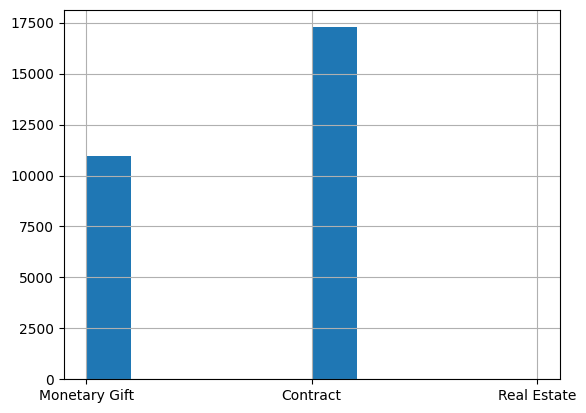

In [12]:
df["Gift Type"].hist()
# roughly 60% contracts, 40% gifts -- real estate is negligible

/home/shreyas/Code/UVA/DSML/EDA/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


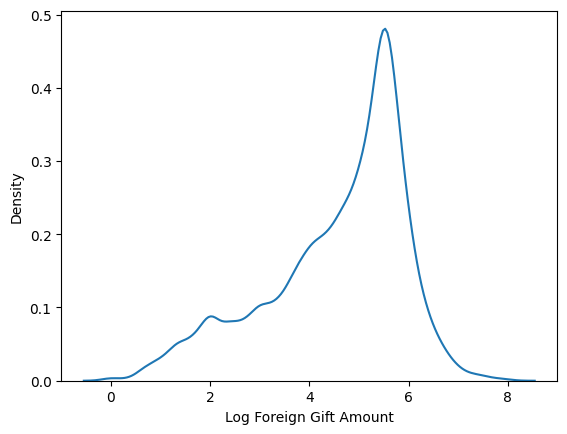

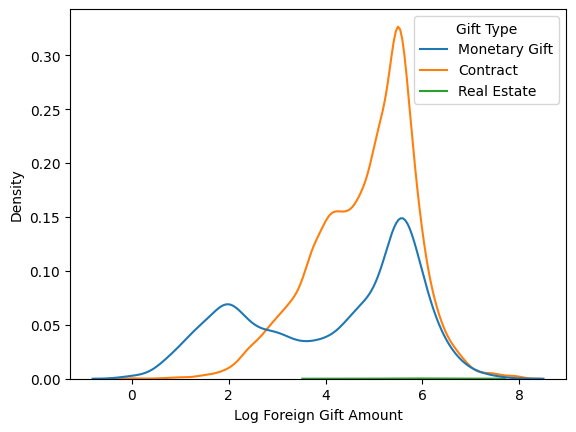

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df["Log Foreign Gift Amount"] = np.log10(df["Foreign Gift Amount"])
plt1 = sns.kdeplot(df, x="Log Foreign Gift Amount")
plt.show()
plt2 = sns.kdeplot(df, x="Log Foreign Gift Amount", hue="Gift Type")
plt.show()

In [40]:
print(df["Country of Giftor"].value_counts().nlargest(15))
print(df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15))

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


<Axes: >

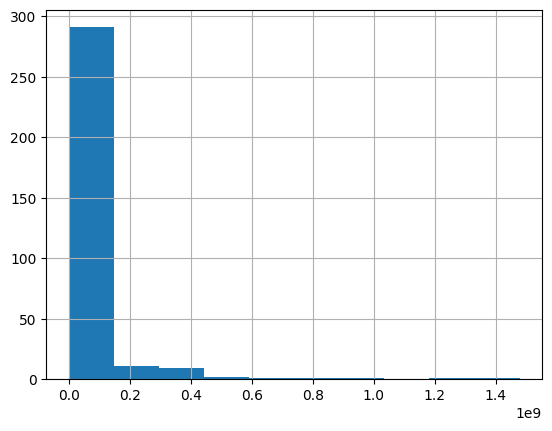

In [39]:
print(df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15))
df.groupby("Institution Name")["Foreign Gift Amount"].sum().hist()

In [42]:
df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("data/airbnb_hw.csv")

In [52]:
print(df.shape)
df.head()

(30478, 13)
Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [ ]:
pd.crosstab(df["Room Type"], df["Property Type"])
# most available rentals are apartments, followed by houses
# houses are mainly rented out as private rooms rather than the whole property
# most bed and breakfasts are rented out as private rooms

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


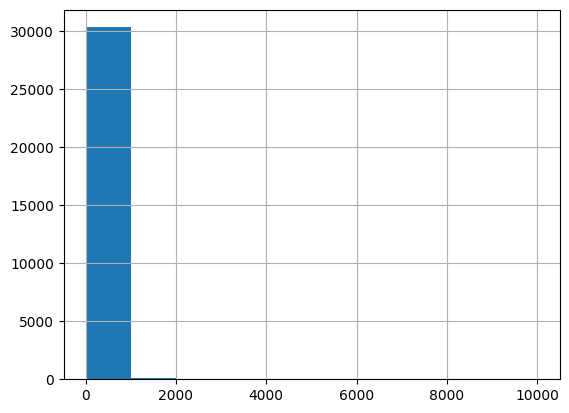

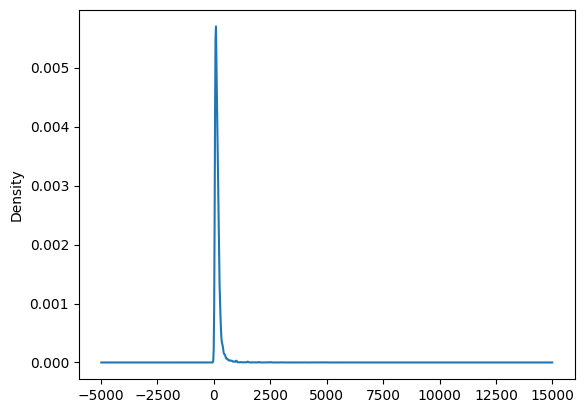

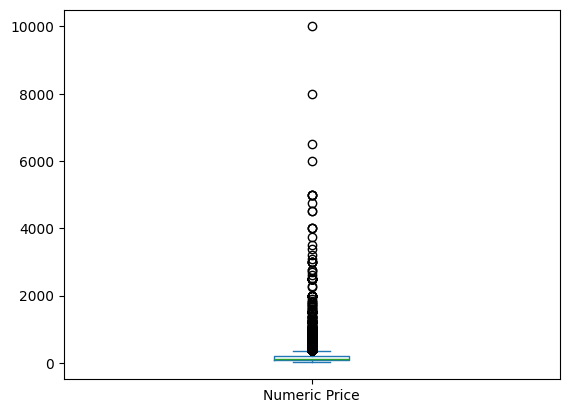

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Numeric Price, dtype: float64


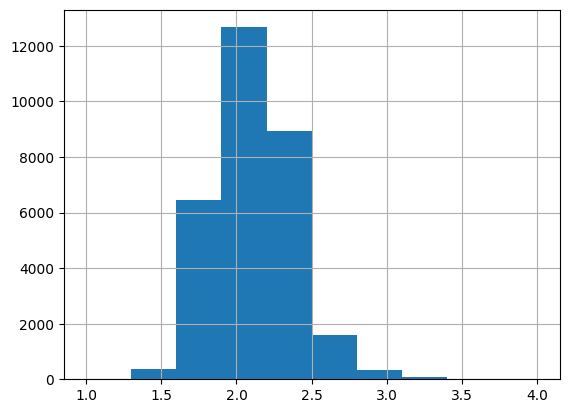

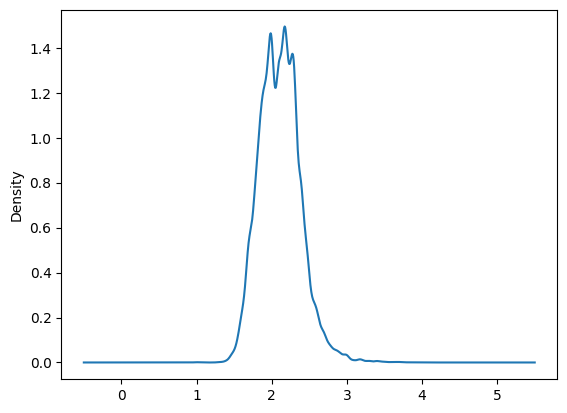

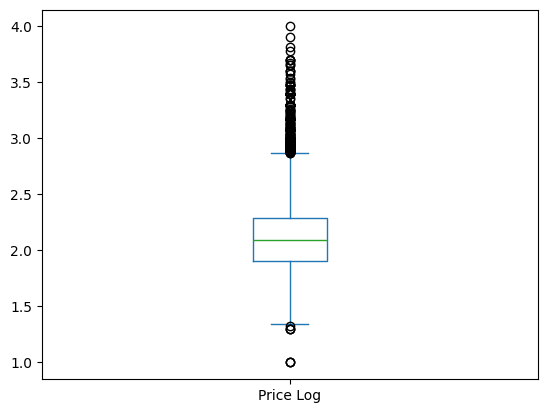

count    30478.000000
mean         2.110886
std          0.272608
min          1.000000
25%          1.903090
50%          2.096910
75%          2.290035
max          4.000000
Name: Price Log, dtype: float64


In [61]:
df["Numeric Price"] = pd.to_numeric(df["Price"].str.replace("$", "").str.replace(",", ""), errors="coerce")
plt1 = df["Numeric Price"].hist()
plt.show()
plt2 = df["Numeric Price"].plot.density()
plt.show()
plt3 = df["Numeric Price"].plot.box()
plt.show()
print(df["Numeric Price"].describe())
# lots of outliers... so many outliers that the boxplot is really hard to read
df["Price Log"] = np.log10(df["Numeric Price"])
plt4 = df["Price Log"].hist()
plt.show()
plt5 = df["Price Log"].plot.density()
plt.show()
plt6 = df["Price Log"].plot.box()
plt.show()
print(df["Price Log"].describe())

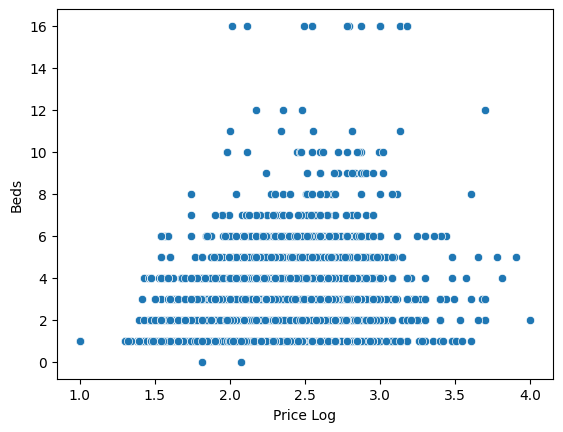

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,1.944230,0.185710,1.812913,1.878572,1.944230,2.009889,2.075547
1.0,20344.0,2.035528,0.234374,1.000000,1.875061,2.000000,2.190332,3.602060
2.0,6610.0,2.212515,0.252075,1.397940,2.060698,2.204120,2.352183,4.000000
3.0,2071.0,2.319496,0.280008,1.414973,2.146128,2.301030,2.477121,3.698970
4.0,783.0,2.380135,0.313283,1.431364,2.176091,2.392697,2.574031,3.812913
5.0,284.0,2.462226,0.319477,1.544068,2.278181,2.462398,2.653213,3.903090
6.0,177.0,2.454541,0.358014,1.544068,2.298853,2.439333,2.628389,3.439333
7.0,45.0,2.439436,0.301175,1.740363,2.247973,2.477121,2.648360,2.954243
8.0,24.0,2.586745,0.374543,1.740363,2.386501,2.544068,2.682263,3.602060


In [64]:
plt7 = sns.scatterplot(data=df, x="Price Log", y="Beds")
plt.show()
# it's all over the place
df["Price Log"].groupby(df["Beds"]).describe()
# mean seems to increase with number of beds; std increases at the lower end but is mixed at the higher end

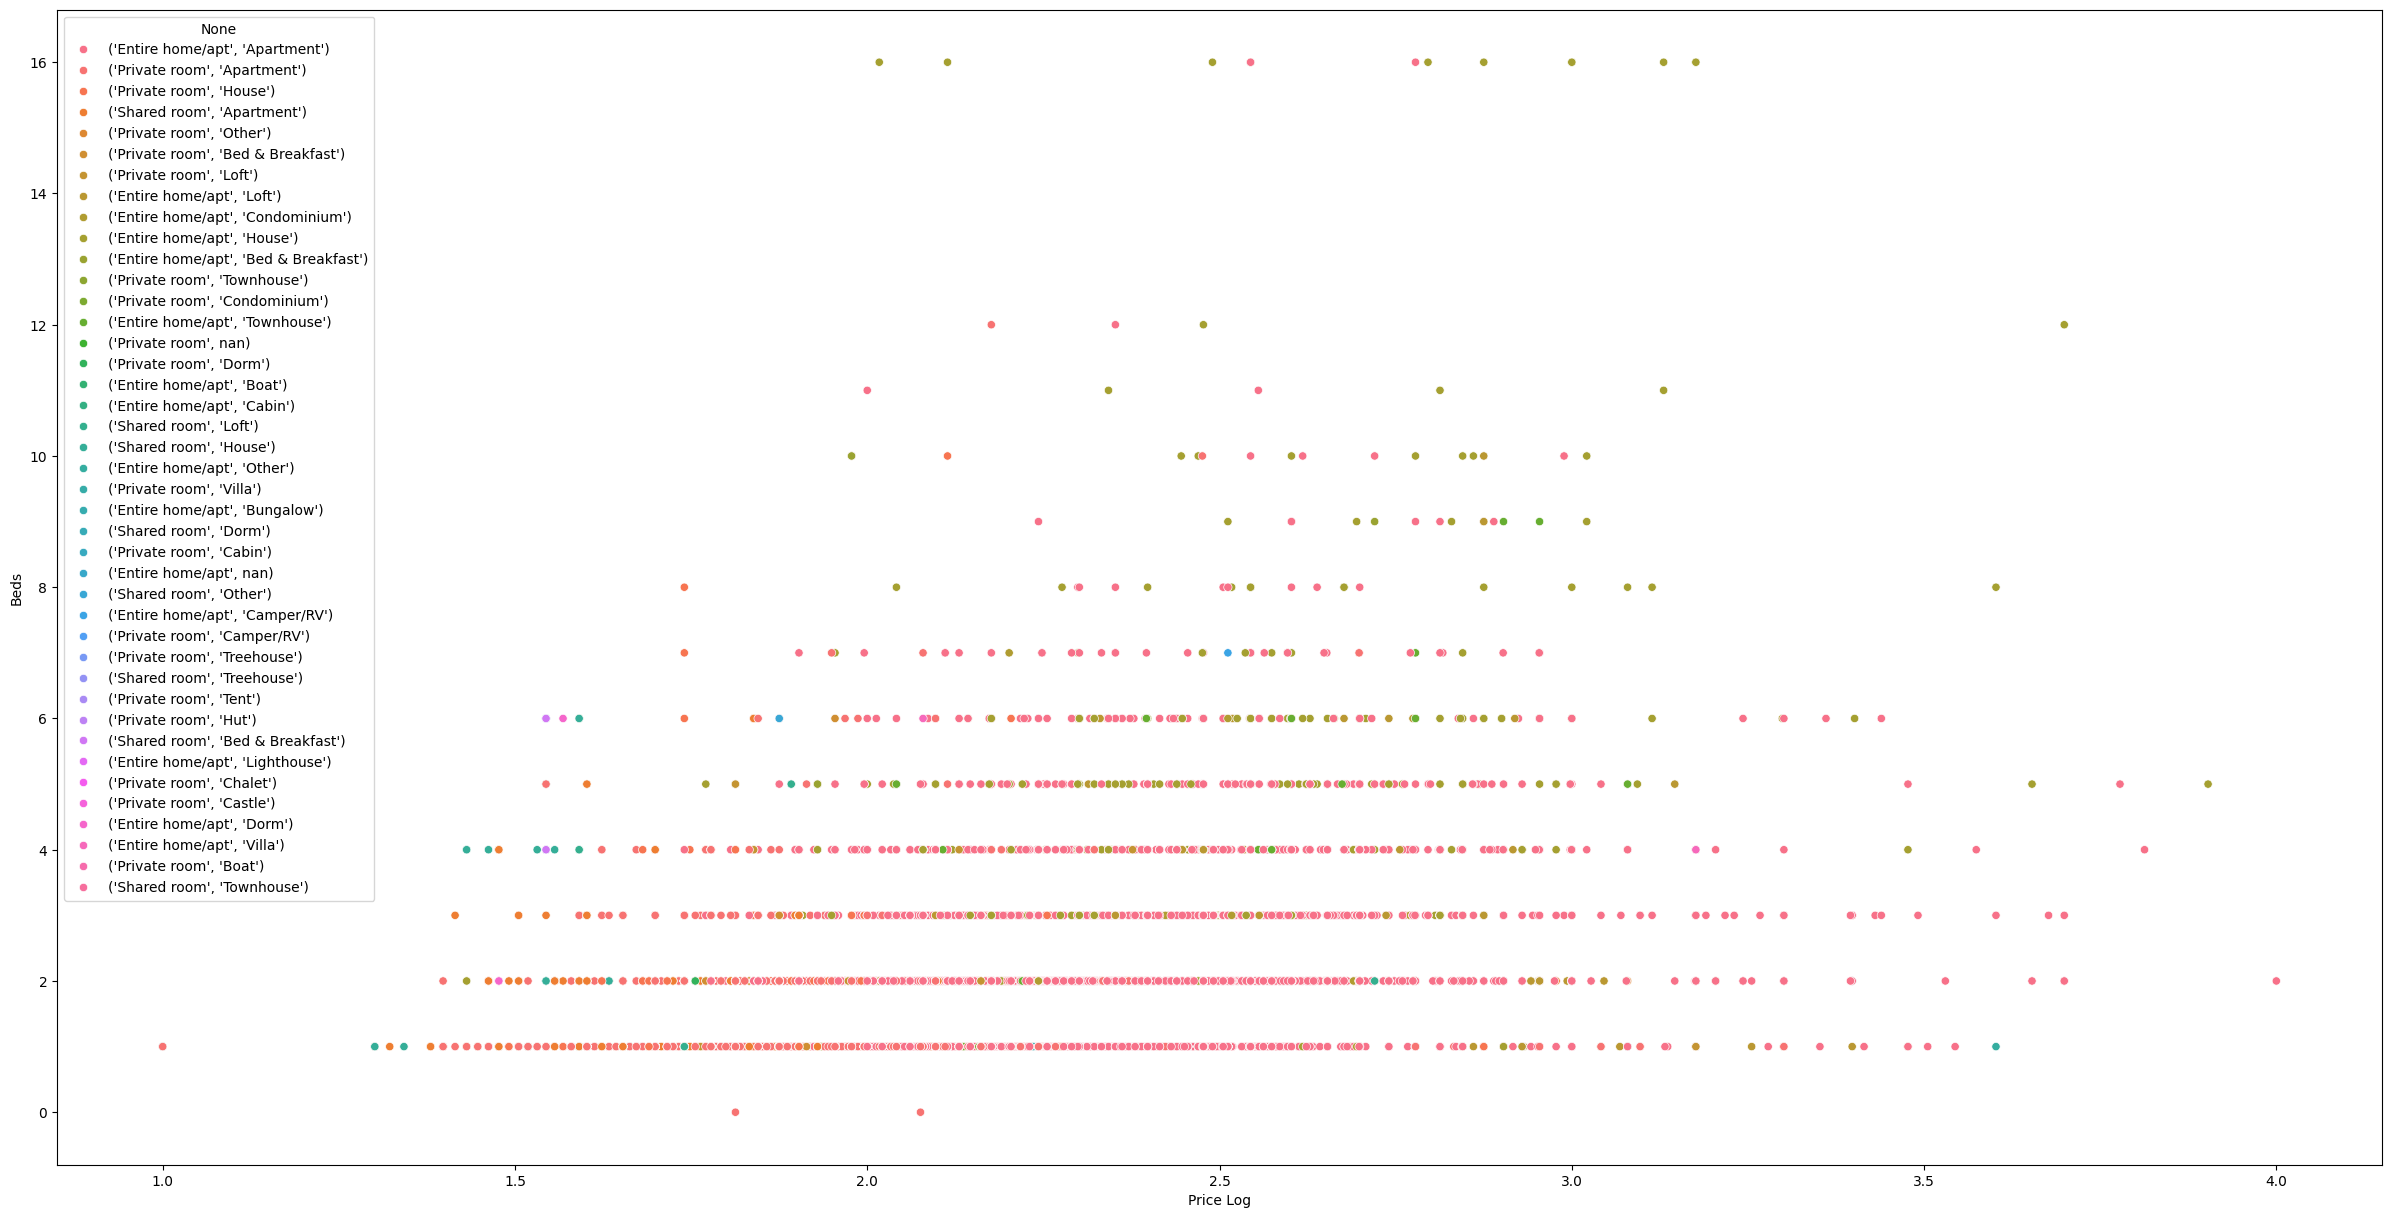

,count,mean,std,min,25%,50%,75%,max
"(Entire home/apt, Apartment)",15669.0,2.261010,0.212559,1.000000,2.130334,2.243038,2.371068,4.000000
"(Entire home/apt, Bed & Breakfast)",13.0,2.204976,0.224232,1.929419,2.082785,2.113943,2.342423,2.720159
"(Entire home/apt, Boat)",7.0,2.181375,0.135553,2.000000,2.088046,2.176091,2.259750,2.397940
"(Entire home/apt, Bungalow)",4.0,2.159567,0.154271,1.939519,2.114770,2.204357,2.249155,2.290035
"(Entire home/apt, Cabin)",1.0,2.397940,NaN,2.397940,2.397940,2.397940,2.397940,2.397940
"(Entire home/apt, Camper/RV)",6.0,1.936112,0.333310,1.653213,1.690196,1.842916,2.055569,2.511883
"(Entire home/apt, Condominium)",72.0,2.392614,0.260168,1.903090,2.190332,2.301030,2.574031,3.298853
"(Entire home/apt, Dorm)",4.0,1.606384,0.202411,1.477121,1.477121,1.522661,1.651924,1.903090
"(Entire home/apt, House)",752.0,2.321219,0.315343,1.431364,2.102080,2.290035,2.477121,3.903090
"(Entire home/apt, Lighthouse)",1.0,1.591065,NaN,1.591065,1.591065,1.591065,1.591065,1.591065


In [73]:
plt8 = sns.scatterplot(data=df, x="Price Log", y="Beds", hue=df[["Room Type", "Property Type"]].apply(tuple, axis=1))
fig = plt.gcf()
fig.set_size_inches(30, 15)
plt.show()
# apartments are on the lower end price-wise; hard to tell much beyond that
df["Price Log"].groupby(df[["Room Type", "Property Type"]].apply(tuple, axis=1)).describe()
# highest mean: "Entire home/apt" and "Other"
# highest std: "Entire home/apt" and "Villa"
# seems like having the entire place is the more variable option price-wise; can get pretty high
# median is likely the more reliable estimate of central tendency since it's less easily skewed by outliers

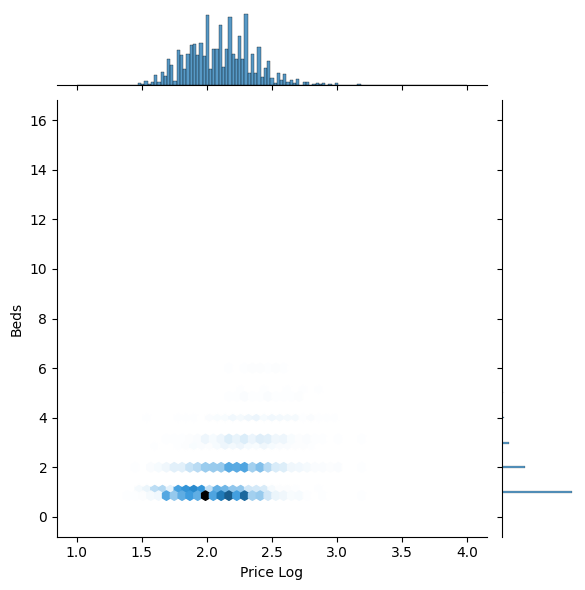

In [74]:
plt9 = sns.jointplot(data=df, x="Price Log", y="Beds", kind="hex")
plt.show()
# this definitely changes my perspective on the data -- the scatterplot makes the data look more uniformly distributed over the range,
# but this shows just how much more dense the range around (2, 1) is than everything else

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.